# Data Understanding

In [62]:
# Import library-library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

In [63]:
dataset = pd.read_csv('D:\PROJECT\Star3642_balanced.csv')
dataset.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [64]:
dataset.shape

(3642, 7)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [67]:
dataset.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [68]:
dataset.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

# Data Preparation
## Encode data value from object to numerical

In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

for c in dataset.columns[0:]:  
    if(dataset[c].dtype=='object'): 
        dataset[c] = encoder.fit_transform(dataset[c])
    else: 
        dataset[c] = dataset[c]

dataset.head() 

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1


## Splitting Data

In [70]:
from sklearn.model_selection import train_test_split

y = dataset['TargetClass']
x = dataset.drop(['TargetClass', 'Vmag', 'Plx', 'Amag', 'e_Plx'], axis = 1)

# Split the dataset to train and test data
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state=0)

## Normalization Data

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Modelling

### 1. K-Nearest Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "algorithm" : "auto",
    "leaf_size" : 30,
    "metric" : "euclidean",
    "metric_params" : None,
    "n_jobs" : 1,
    "n_neighbors" : 6,
    "p": 2,
    "weights" : "uniform"
}

KNN = KNeighborsClassifier(**parameters)

In [73]:
KNN.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6)

In [74]:
KNN_Predictions = KNN.predict(test_x)

### 2. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

RF_model = RandomForestClassifier(**parameters)

In [76]:
RF_model.fit(train_x, train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [77]:
RF_predictions = RF_model.predict(test_x)

# Evaluation

### 1. K-Nearest Neightbor

In [78]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Accuracy, Precision, Recall, F1

print('<--------- Score K-Nearest Neighbour --------->\n')

acc_score = accuracy_score(test_y ,KNN_Predictions)
print('Accuracy \t:',acc_score,'\n')

prec_score = precision_score(test_y ,KNN_Predictions)
print('Precision \t:',prec_score,'\n')

rec_score = recall_score(test_y ,KNN_Predictions)
print('Recall \t\t:',rec_score,'\n')

fscore = f1_score(test_y ,KNN_Predictions)
print('F1 \t\t:',fscore)

<--------- Score K-Nearest Neighbour --------->

Accuracy 	: 0.8888888888888888 

Precision 	: 0.8839779005524862 

Recall 		: 0.8913649025069638 

F1 		: 0.8876560332871013


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(test_y, KNN_Predictions,labels=[1,0])
print('<------- Confusion matrix ------->\n', matrix)

<------- Confusion matrix ------->
 [[320  39]
 [ 42 328]]


In [80]:
tp, fn, fp, tn = confusion_matrix(test_y, KNN_Predictions,labels=[1,0]).reshape(-1)
print(f'<-------- Outcome values -------->\n True Positive (TP) \t: {tp} \n False Negative (FN) \t: {fn} \n False Positive (FP) \t: {fp} \n True Negative (TN) \t: {tn}')

<-------- Outcome values -------->
 True Positive (TP) 	: 320 
 False Negative (FN) 	: 39 
 False Positive (FP) 	: 42 
 True Negative (TN) 	: 328


In [81]:
matrix = classification_report(test_y, KNN_Predictions,labels=[1,0])
print('<--------------- Classification report --------------->\n', matrix)

<--------------- Classification report --------------->
               precision    recall  f1-score   support

           1       0.88      0.89      0.89       359
           0       0.89      0.89      0.89       370

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



### 2. Random Forest

In [82]:
#Accuracy, Precision, Recall, F1

print('<--------- Score Random Forest Model --------->\n')

acc_score = accuracy_score(test_y ,RF_predictions)
print('Accuracy \t:',acc_score,'\n')

prec_score = precision_score(test_y ,RF_predictions)
print('Precision \t:',prec_score,'\n')

rec_score = recall_score(test_y ,RF_predictions)
print('Recall \t\t:',rec_score,'\n')

fscore = f1_score(test_y ,RF_predictions)
print('F1 \t\t:',fscore)

<--------- Score Random Forest Model --------->

Accuracy 	: 0.9039780521262003 

Precision 	: 0.8958904109589041 

Recall 		: 0.9108635097493036 

F1 		: 0.9033149171270718


In [83]:
tp, fn, fp, tn = confusion_matrix(test_y, RF_predictions,labels=[1,0]).reshape(-1)
print(f'<-------- Outcome values -------->\n True Positive (TP) \t: {tp} \n False Negative (FN) \t: {fn} \n False Positive (FP) \t: {fp} \n True Negative (TN) \t: {tn}')

<-------- Outcome values -------->
 True Positive (TP) 	: 327 
 False Negative (FN) 	: 32 
 False Positive (FP) 	: 38 
 True Negative (TN) 	: 332


In [84]:
rf_matrix = confusion_matrix(test_y, RF_predictions,labels=[1,0])
print('<------- Confusion matrix ------->\n', rf_matrix)

<------- Confusion matrix ------->
 [[327  32]
 [ 38 332]]


In [85]:
rf_matrix = classification_report(test_y, RF_predictions,labels=[1,0])
print('<--------------- Classification report --------------->\n', rf_matrix)

<--------------- Classification report --------------->
               precision    recall  f1-score   support

           1       0.90      0.91      0.90       359
           0       0.91      0.90      0.90       370

    accuracy                           0.90       729
   macro avg       0.90      0.90      0.90       729
weighted avg       0.90      0.90      0.90       729



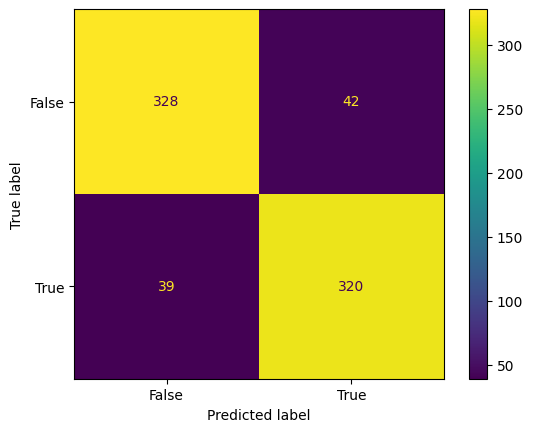

In [86]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_y, KNN_Predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Visualization

### 1. K-Nearest Neighbors

C:\Users\pagu2\AppData\Local\Temp\ipykernel_4492\900867947.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


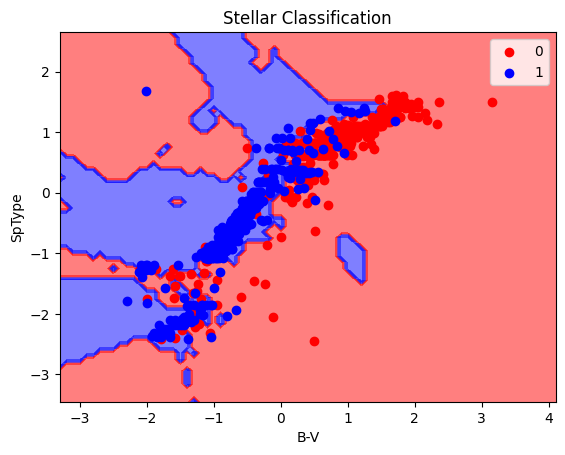

In [87]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, KNN.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

### 2. Random Forest

C:\Users\pagu2\AppData\Local\Temp\ipykernel_4492\416100564.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


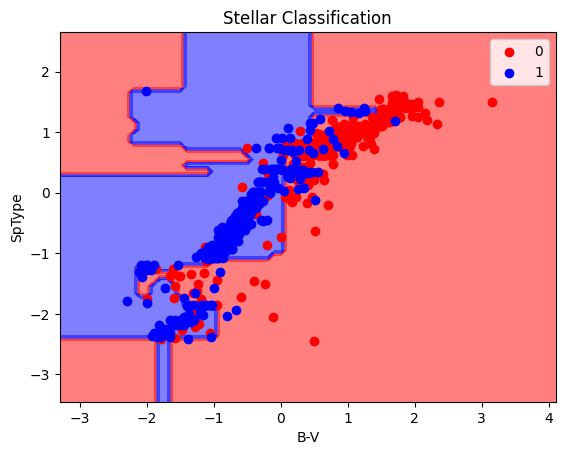

In [88]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, RF_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

In [89]:
# Import style 1 (Without Alias)
import pickle

# Import style 2 (With Alias)
import pickle as pk

In [90]:
with open("desired-model-file-name.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(RF_model, file) # Dump function is us

In [91]:
pickle.dump(RF_model, open("desired-model-file-name.pkl", "wb"))

In [93]:
# Open saved model using 2nd method
model_mtd2 = pickle.load(open("desired-model-file-name.pkl", "rb"))

# Now, to make use of the model as you normally would

result = model_mtd2.predict([[0.20,12.47]])
if result[0]==1:
    print("It is a dwarf star ")
elif result[0]==0:
    print("It is giant star")
else:
    print("nil")    

it is a dwarf star 
